<a href="https://colab.research.google.com/github/kei2/colab/blob/main/YOLO_NAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO-NASを試してみる
参考: https://tt-tsukumochi.com/archives/7775

YOLO-NASは2023/05発表の新しい物体認識モデル。大変性能が良い、ということ

In [1]:
!pip install super-gradients

In [9]:
import super_gradients
yolo_nas = super_gradients.training.models.get("yolo_nas_m", pretrained_weights="coco").cuda()

[2023-08-22 03:54:28] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_m_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_m_coco.pth
100%|██████████| 196M/196M [00:01<00:00, 164MB/s]
[2023-08-22 03:54:30] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


[2023-08-22 03:54:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


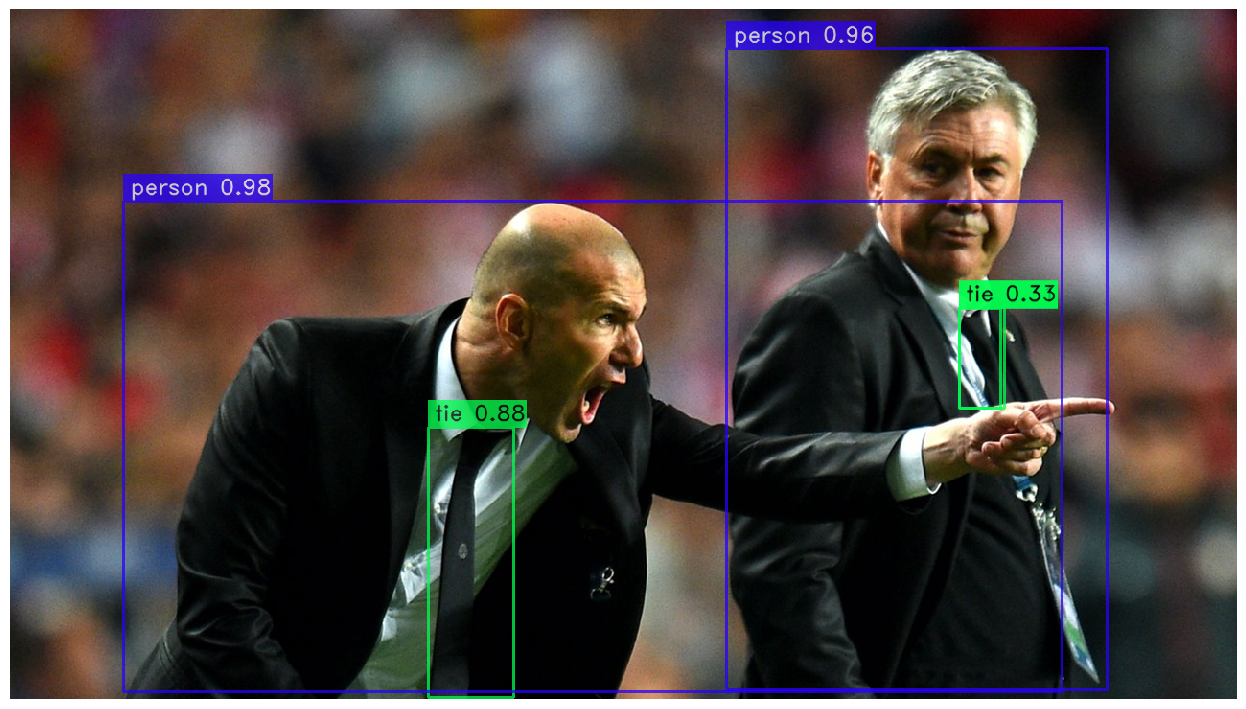

In [10]:
yolo_nas.predict('https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg').show()

## 閾値の指定 (conf=0.5)

[2023-08-22 03:33:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


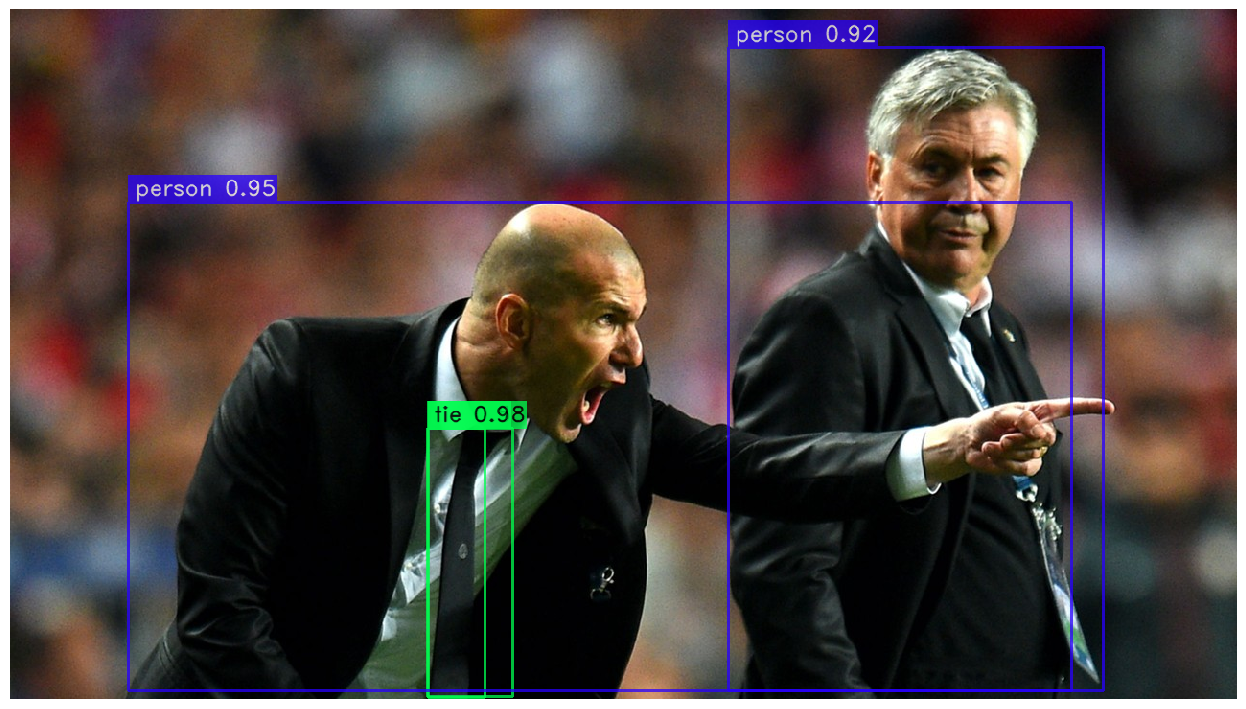

In [12]:
yolo_nas.predict('https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg',conf=0.5).show()

## 動画から認識

In [13]:
!python -m pip install -U yt-dlp

In [14]:
!yt-dlp --list-formats https://www.youtube.com/watch?v=VhgMI5i2sxc

[youtube] Extracting URL: https://www.youtube.com/watch?v=VhgMI5i2sxc
[youtube] VhgMI5i2sxc: Downloading webpage
[youtube] VhgMI5i2sxc: Downloading ios player API JSON
[youtube] VhgMI5i2sxc: Downloading android player API JSON
[youtube] VhgMI5i2sxc: Downloading m3u8 information
[info] Available formats for VhgMI5i2sxc:
ID  EXT   RESOLUTION FPS CH │   FILESIZE   TBR PROTO │ VCODEC          VBR ACODEC      ABR ASR MORE INFO
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
sb2 mhtml 48x27        0    │                  mhtml │ images                                  storyboard
sb1 mhtml 80x45        1    │                  mhtml │ images                                  storyboard
sb0 mhtml 160x90       1    │                  mhtml │ images                                  storyboard
233 mp4   audio only        │                  m3u8  │ audio only          unknown             Default
234 mp4   audio only        │         

In [3]:
!yt-dlp -f 396 https://www.youtube.com/watch?v=VhgMI5i2sxc

[youtube] Extracting URL: https://www.youtube.com/watch?v=VhgMI5i2sxc
[youtube] VhgMI5i2sxc: Downloading webpage
[youtube] VhgMI5i2sxc: Downloading ios player API JSON
[youtube] VhgMI5i2sxc: Downloading android player API JSON
[youtube] VhgMI5i2sxc: Downloading m3u8 information
[info] VhgMI5i2sxc: Downloading 1 format(s): 396
[download] Destination: Every Angle： Mitoma's Superb SOLO Goal Against Wolves [VhgMI5i2sxc].mp4
[download] 100% of    9.25MiB in 00:00:00 at 20.29MiB/s


ファイル名を test.mp4 へリネーム.20秒ほどにカットして、test3.mp4を作成

In [11]:
yolo_nas.predict('test3.mp4',conf=0.4,).save(output_path = 'result.mp4')

Predicting Video: 100%|██████████| 522/522 [00:11<00:00, 46.79it/s]
